<a href="https://colab.research.google.com/github/mawaddahAlharthi/Data-modeling/blob/main/DM_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## "Loading, Normalizing, and Preprocessing Fashion MNIST Data with Sample Visualization"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, LSTM, Reshape
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Define class names for Fashion MNIST dataset
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Load and preprocess Fashion MNIST dataset with visualization
def load_and_preprocess_data():
    # Load the dataset
    (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

    # Display sample images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(train_images[i], cmap='gray')
        plt.title(class_names[train_labels[i]])
        plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Normalize pixel values
    train_images = train_images / 255.0
    test_images = test_images / 255.0

    return train_images, train_labels, test_images, test_labels

## Build and compile CNN model

In [ ]:
def build_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


## Build and compile RNN model

In [ ]:
# Build and compile RNN model
def build_rnn_model():
    model = Sequential([
        Reshape((28, 28), input_shape=(28, 28, 1)),
        LSTM(64, return_sequences=True),
        LSTM(64),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model


## summary for CNN,RNN models

In [ ]:
model = build_cnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model = build_rnn_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)                  │ (None, 28, 28)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 28, 64)              │          23,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,642 (240.79 KB)

 Trainable params: 61,642 (240.79 KB)

 Non-trainable params: 0 (0.00 B)

## Training and Evaluating CNN, RNN, and SVM Models on Fashion MNIST Dataset

In [ ]:
def train_and_evaluate_models(train_images, train_labels, test_images, test_labels, cnn_model, rnn_model, svm_model):

    # Reshape data for different models
    train_images_cnn = train_images.reshape((60000, 28, 28, 1))
    test_images_cnn = test_images.reshape((10000, 28, 28, 1))
    train_images_rnn = train_images.reshape((60000, 28, 28))
    test_images_rnn = test_images.reshape((10000, 28, 28))

    # Train CNN and RNN models
    cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, validation_split=0.2, verbose=1)
    rnn_history = rnn_model.fit(train_images_rnn, train_labels, epochs=10, validation_split=0.2, verbose=1)

    # Prepare and train SVM model
    scaler = StandardScaler()
    train_images_svm = scaler.fit_transform(train_images.reshape((60000, 28*28)))
    test_images_svm = scaler.transform(test_images.reshape((10000, 28*28)))
    svm_model.fit(train_images_svm[:5000], train_labels[:5000])  # Using subset for SVM due to computational constraints

    # Evaluate models
    cnn_accuracy = cnn_model.evaluate(test_images_cnn, test_labels)[1]
    rnn_accuracy = rnn_model.evaluate(test_images_rnn, test_labels)[1]
    svm_predictions = svm_model.predict(test_images_svm)
    svm_accuracy = accuracy_score(test_labels, svm_predictions)

    return cnn_accuracy, rnn_accuracy, svm_accuracy, cnn_history, rnn_history


## Visualize results

In [ ]:
def compare_results(cnn_accuracy, rnn_accuracy, svm_accuracy, cnn_history, rnn_history):

    print(f'CNN Accuracy: {cnn_accuracy:.4f}')
    print(f'RNN Accuracy: {rnn_accuracy:.4f}')
    print(f'SVM Accuracy: {svm_accuracy:.4f}')

    plt.figure(figsize=(18, 6))

    # Plot model accuracy comparison
    plt.subplot(1, 3, 1)
    colors = ['#3498db', '#e74c3c', '#2ecc71']
    plt.bar(['CNN', 'RNN', 'SVM'], [cnn_accuracy, rnn_accuracy, svm_accuracy], color=colors)
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')

    # Plot CNN training history
    plt.subplot(1, 3, 2)
    plt.plot(cnn_history.history['accuracy'], label='Training Accuracy', color='#3498db')
    plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy', color='#e74c3c')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot RNN training history
    plt.subplot(1, 3, 3)
    plt.plot(rnn_history.history['accuracy'], label='Training Accuracy', color='#3498db')
    plt.plot(rnn_history.history['val_accuracy'], label='Validation Accuracy', color='#e74c3c')
    plt.title('RNN Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


## Main Function for Training and Evaluating Machine Learning Models on the Fashion MNIST Dataset

Step 1: Loading and visualizing Fashion MNIST dataset...


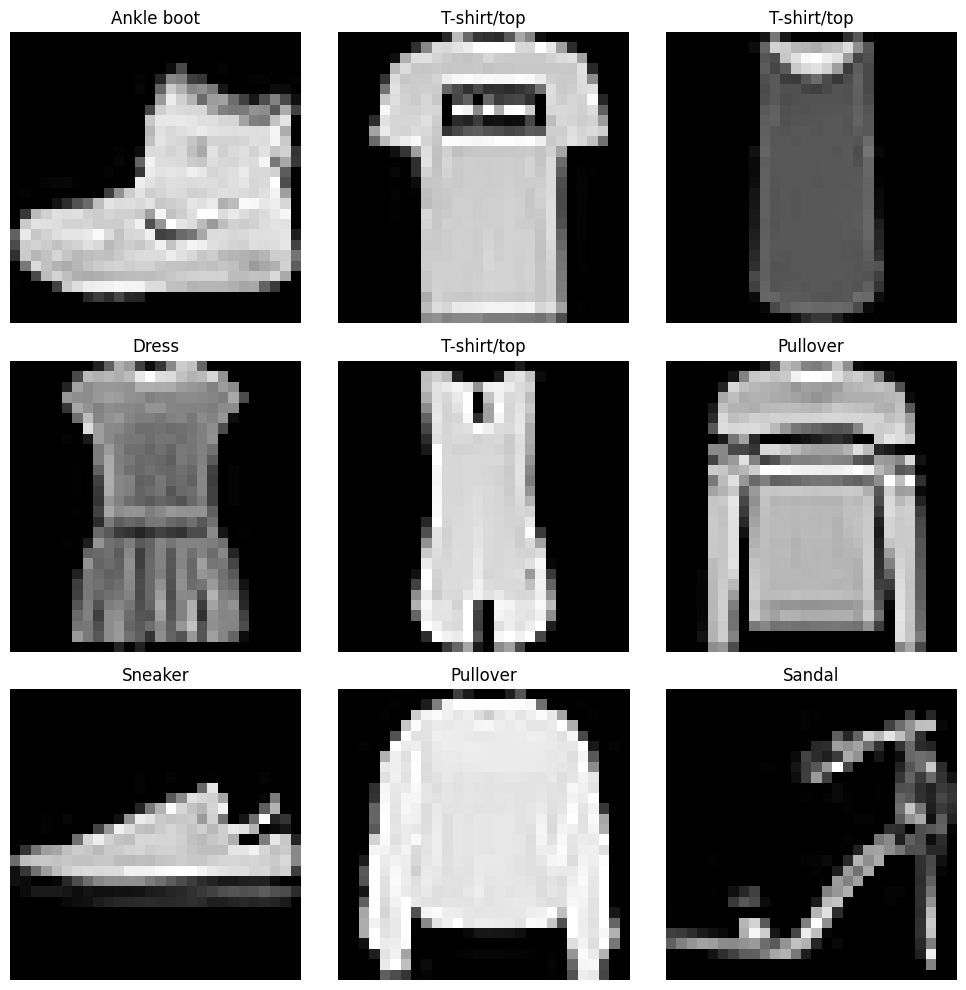


Step 2: Building models...

Step 3: Training and evaluating models...
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.7550 - loss: 0.6873 - val_accuracy: 0.8515 - val_loss: 0.3994
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.8757 - loss: 0.3399 - val_accuracy: 0.8870 - val_loss: 0.3165
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.8985 - loss: 0.2833 - val_accuracy: 0.8951 - val_loss: 0.2876
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9075 - loss: 0.2564 - val_accuracy: 0.9023 - val_loss: 0.2709
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9161 - loss: 0.2273 - val_accuracy: 0.9068 - val_loss: 0.2615
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9249 - loss: 0.2030 - val_accuracy: 0.8978 - val_loss: 0.2844
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9303 - loss: 0.1851 - val_accuracy: 0.9133 - val_loss: 0.2515
Epoch

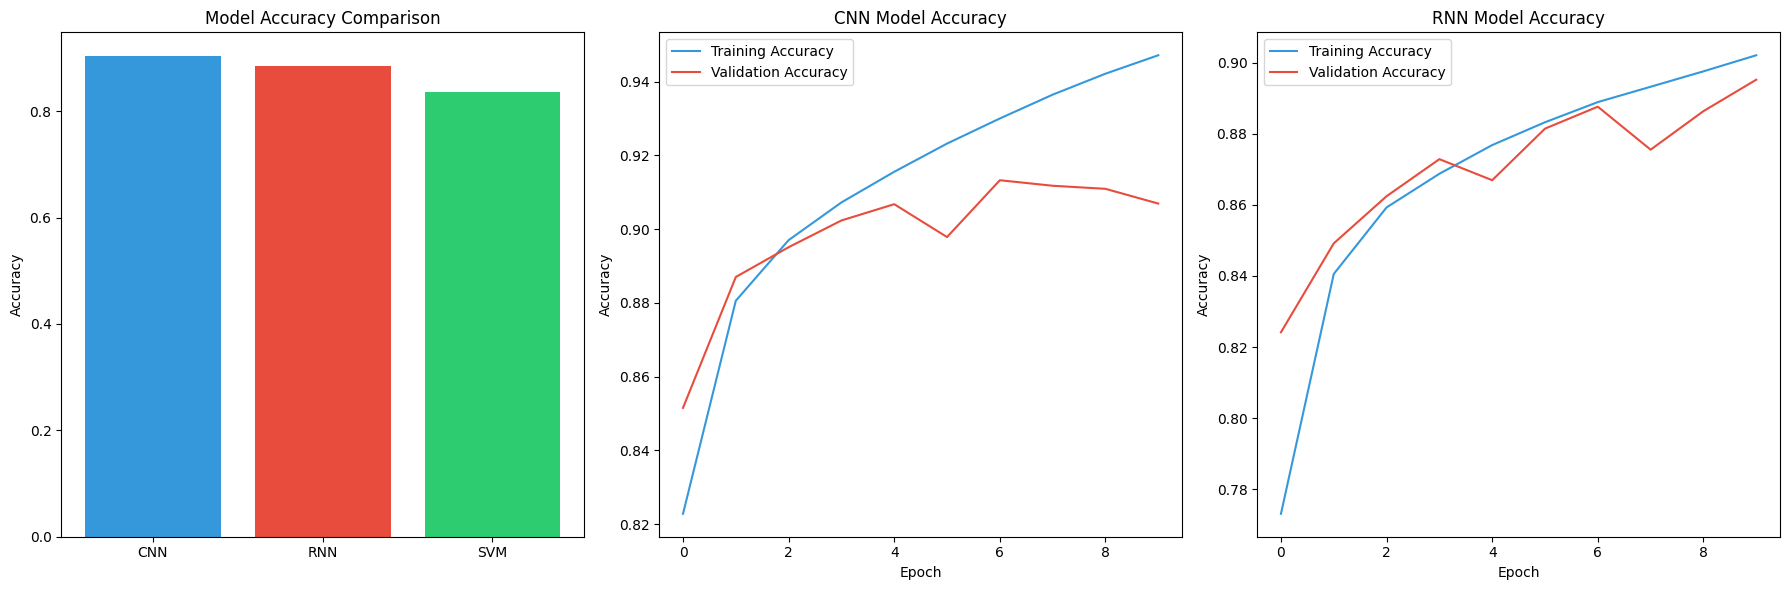

In [ ]:
def main():
    """
    Main function to orchestrate the entire process
    """
    # 1. Load and visualize data
    print("Step 1: Loading and visualizing Fashion MNIST dataset...")
    train_images, train_labels, test_images, test_labels = load_and_preprocess_data()

    # 2. Initialize models
    print("\nStep 2: Building models...")
    cnn_model = build_cnn_model()
    rnn_model = build_rnn_model()
    svm_model = SVC(kernel='rbf', random_state=42)

    # 3. Train and evaluate
    print("\nStep 3: Training and evaluating models...")
    cnn_accuracy, rnn_accuracy, svm_accuracy, cnn_history, rnn_history = train_and_evaluate_models(
        train_images, train_labels, test_images, test_labels, cnn_model, rnn_model, svm_model
    )

    # 4. Compare results
    print("\nStep 4: Comparing results...")
    compare_results(cnn_accuracy, rnn_accuracy, svm_accuracy, cnn_history, rnn_history)






if __name__ == "__main__":
    main()